# Virat Kohli : Batting Analysis (2008-2018):
**Virat Kohli** is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.

<img src="https://images.thequint.com/thequint%2F2018-01%2F5d369107-8477-4216-a39d-ad806e1d3a0c%2FVirat-century.jpg?rect=0%2C0%2C4650%2C2616&auto=format%2Ccompress&fmt=webp&w=700&dpr=1.0.jpg" width="500" height="500" />

**Born**: November 5, 1988, Delhi, India

**Team**: India national cricket team

**Sport**: Cricket

**Nationality**: India

**Data Dictionary**
1. RunsScored : Number of Runs scored by Kohli in the match.
2. BallsFaced : Number of Balls Faces by Kohli in the match.
3. BattingPosition : Batting position is Virat Kohli's position on the batting order.
4. Dismissal : How Kohli got out in the match or not out. Caught, NO: Not Out, Bowled, Run out, LBW, Stumped, Hit wicket.
5. Inning : An innings is one of the divisions of a match during which one team takes its turn to bat. Two 1st inning or 2nd inning.
6. Opposition : Name of the Opposition team.
7. Year : Year in which the match was played.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Read Bastman details file
mydata = pd.read_csv('./Dataset/Batsman.csv')

## Q 1. What is the best way that the opposition team bowlers can get Kohli out?

Which Dismissal had made Kohli out most of the times?
proper representation high to low
[Hint: Use countplot]

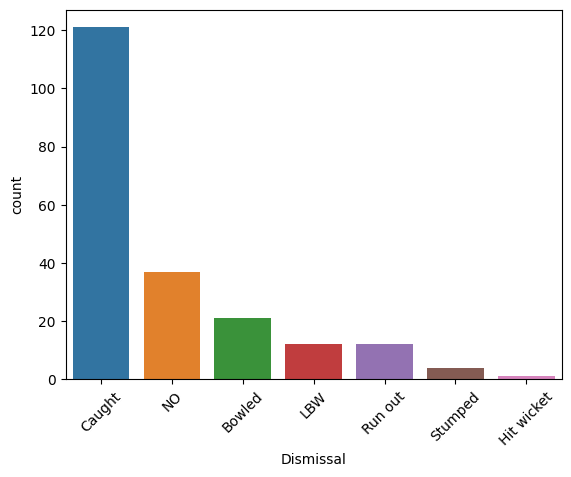

In [5]:
# Count plot of Dismissals
sns.countplot(x ='Dismissal',
              data = mydata,
              order = mydata['Dismissal'].value_counts().index)
plt.xticks(rotation=45)
plt.show()


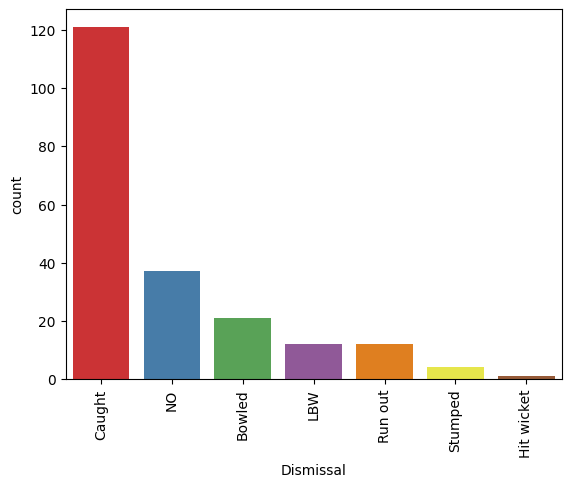

In [6]:
# Count plot of Dismissals
sns.countplot(x ='Dismissal',
              data = mydata, palette='Set1',
              order = mydata['Dismissal'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

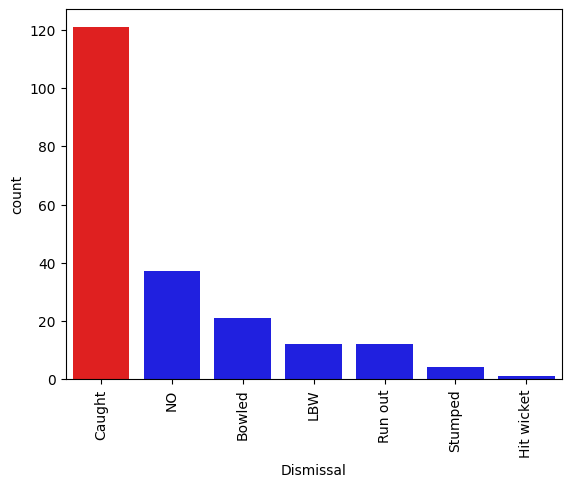

In [7]:
# Count plot of Dismissals
custom_colors = ['red', 'blue', 'blue','blue','blue','blue', 'blue']
sns.countplot(x ='Dismissal',
              data = mydata, palette=custom_colors,
              order = mydata['Dismissal'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

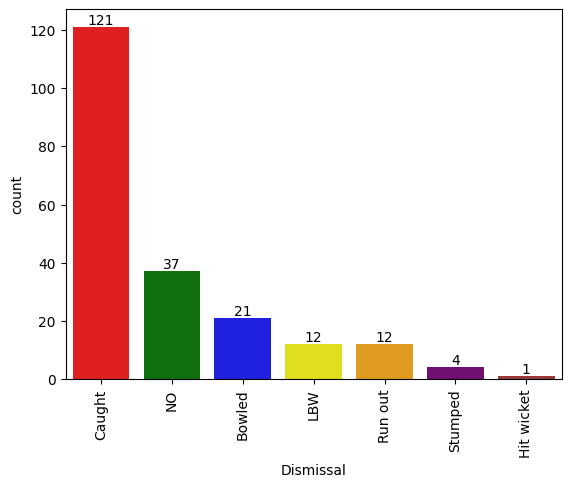

In [16]:
# Count plot of Dismissals
custom_colors = ['red', 'green', 'blue','yellow','orange','purple', 'brown']
sns.countplot(x ='Dismissal',
              data = mydata, palette=custom_colors,
              order = mydata['Dismissal'].value_counts().index)
plt.xticks(rotation=90)

for index, value in enumerate(mydata['Dismissal'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

The most number of times Kohli has got out is by getting caught.

<img src="https://imgk.timesnownews.com/story/Zampa_Kohli.png?tr=w-600,h-450,fo-auto" width="500" height="200" />

 Apart from that he seems to stay not out for most of the innings and looks like it is hard to get him out by other ways apart from being caught.

## Q 2. Against which opposition team Kohli has played the most in his career?
[Hint: Use Countplot]

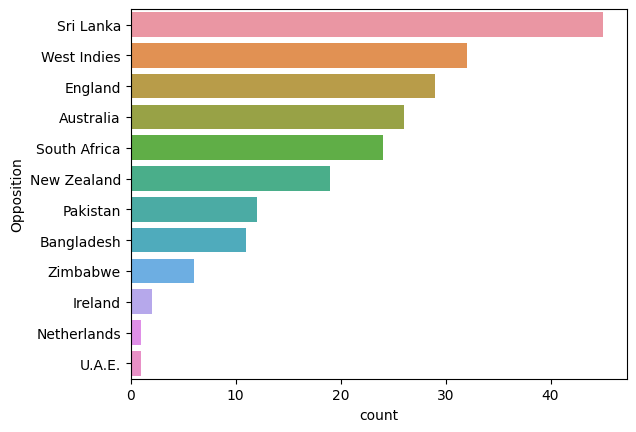

In [10]:
# Countplot of Opposition - horizontally plotted
sns.countplot(y=mydata['Opposition'],order = mydata['Opposition'].value_counts().index)
plt.show()

As we can see, Kohli has played against Srilanka the most in his career, followed by West Indies and England.

## Q 3. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.
[Hint: Stacked Bar Plot] [ct=crosstab]

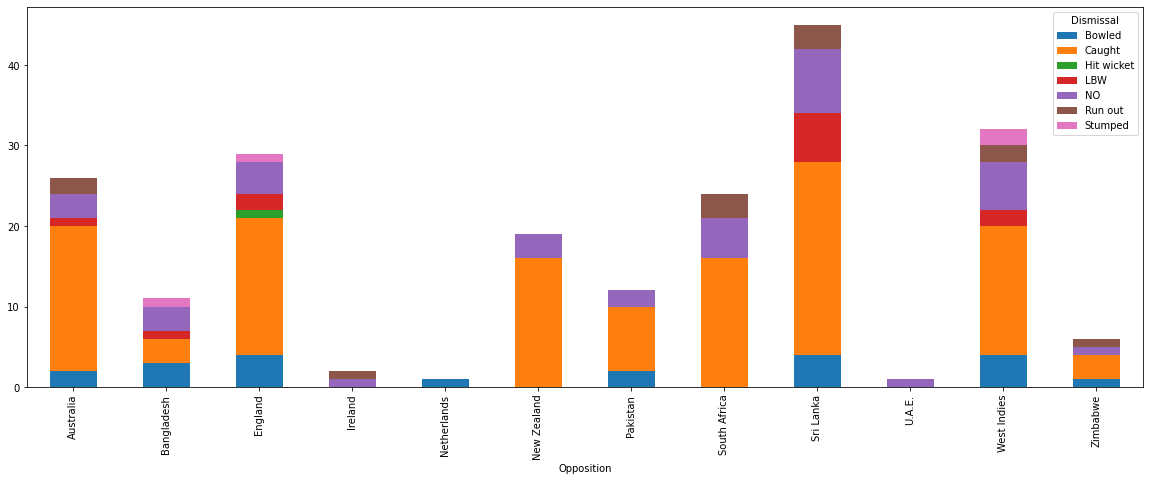

In [5]:
ct = pd.crosstab(mydata['Opposition'],mydata['Dismissal'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

In [12]:
ct = pd.crosstab(mydata['Opposition'],mydata['Dismissal'], margins=False)
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

KeyError: "['All'] not found in axis"

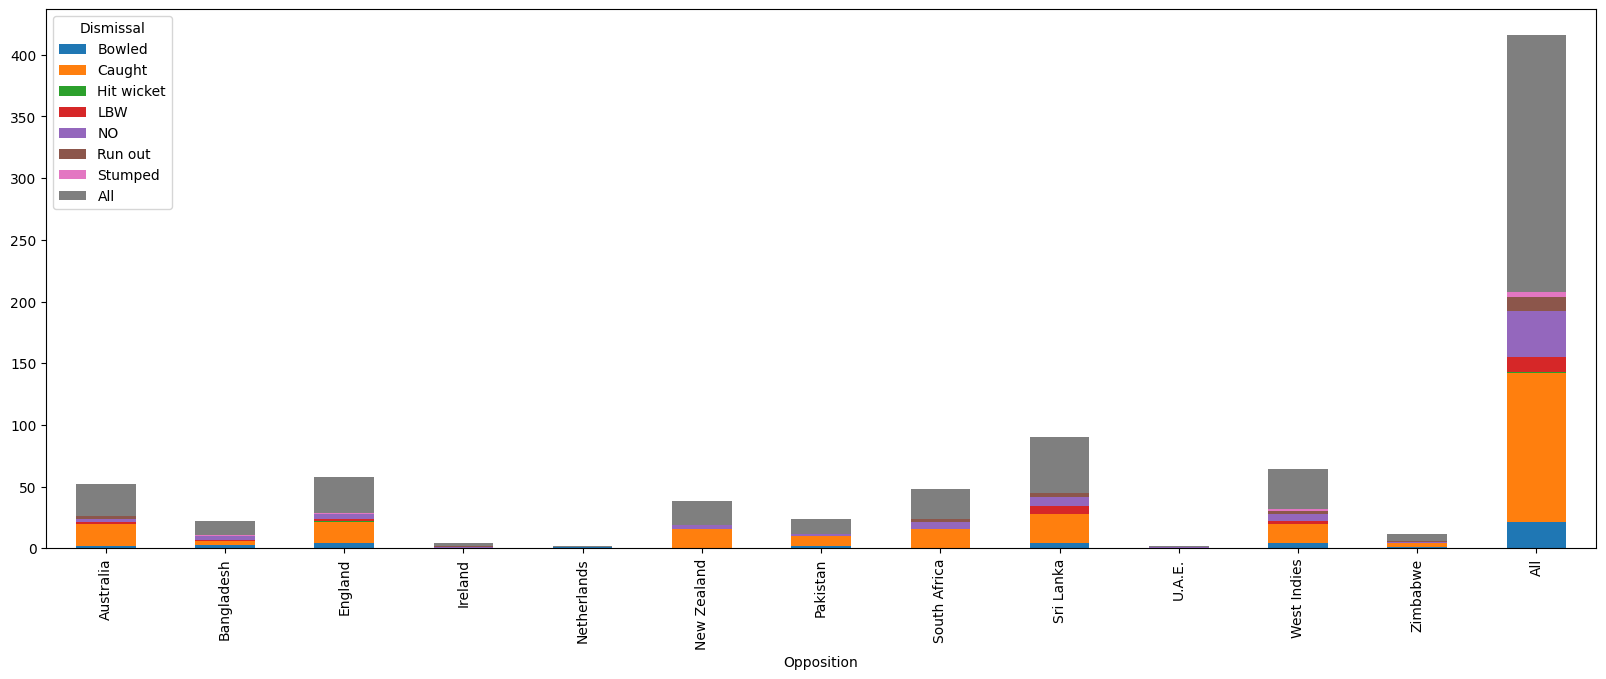

In [37]:
ct = pd.crosstab(mydata['Opposition'],mydata['Dismissal'], margins=True)
ct.drop('All',inplace = False)
ct.drop('All',axis = 1,inplace = False)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

The one time Netherlands has been able to dismiss Kohli is by getting him bowled. 

He has stayed not-out against UAE in the one match he played/did not get a chance to bat against them.

He has got out by hit wicket against England.

Interestingly, he has been dismissed by New Zealand only by catching.

No other team has been able to stump him other than Bangladesh, England and West Indies

## Q 4. Which opposition has Kohli scored most runs against? Find the median score against different oppositions and use a boxplot to represent it?
[Hint: Use barchart & BoxPlot]

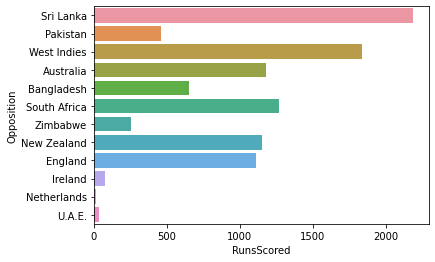

In [6]:
# Bar plot of Total runs scored against each Oppostion
sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None)
# ci=None: Display of confidence intervals is not expected
#estimator = np.sum: Statistical function to estimate within each categorical bin sum wise
plt.show()

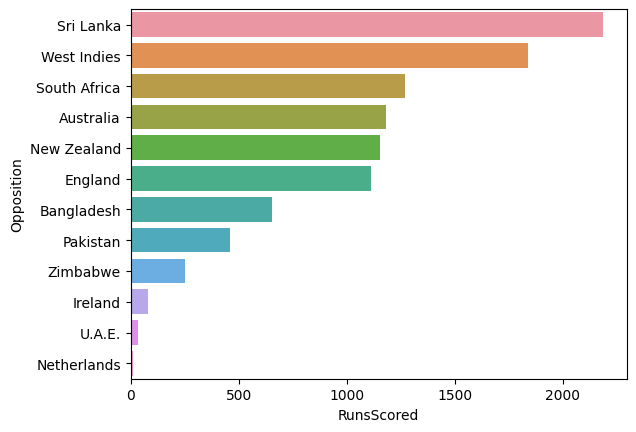

In [42]:
# Bar plot of Total runs scored against each Oppostion
total_runs_per_opposition = mydata.groupby('Opposition')['RunsScored'].sum().sort_values(ascending=False).index
sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None, order=total_runs_per_opposition)
# ci=None: Display of confidence intervals is not expected
#estimator = np.sum: Statistical function to estimate within each categorical bin sum wise
plt.show()

He has scored most runs against Srilanka.

**As the total runs scored would depend on the number of matches played against an opposition. May be that is why SriLanka coming at the top here. Let us check whether boxplot tells the same story.**

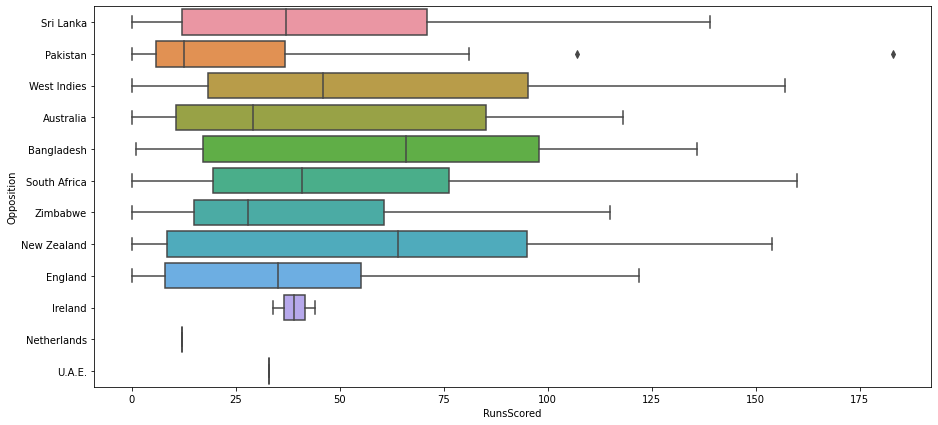

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata)
plt.show()

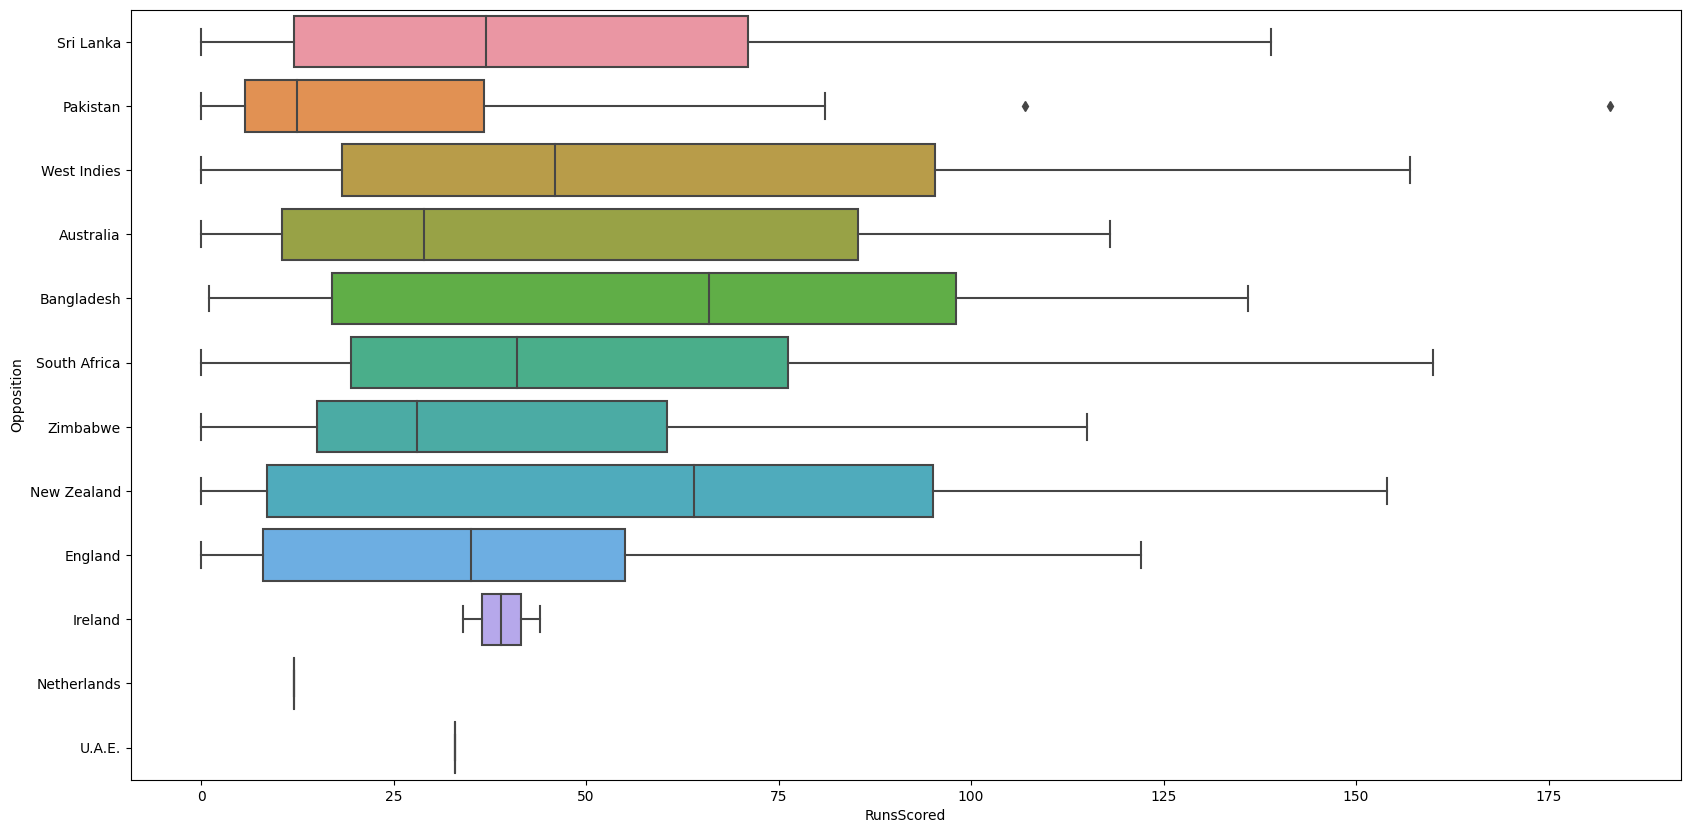

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata)
plt.show()

In [8]:
mydata[mydata["Opposition"]=="Bangladesh"]["RunsScored"].median() 

66.0

In [9]:
mydata[mydata["Opposition"]=="New Zealand"]["RunsScored"].median() 

64.0

In [10]:
mydata[mydata["Opposition"]=="Sri Lanka"]["RunsScored"].median() 

37.0

**Highest Median is against Bangladesh. As seen in the above plot for countries like Bangladesh and New Zealand he has scored above 66 and 64 respectively in 50% of the matches played against each of them, While against Sri Lanka he has scored more then only 37 in 50% of the matches.**

## Q 5. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.
[Hint: Use Boxplot]

In [11]:
 mydata.groupby('Inning')['RunsScored'].sum()

Inning
1    4060
2    6172
Name: RunsScored, dtype: int64

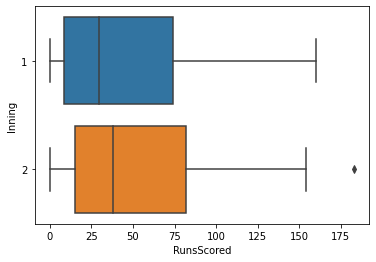

In [12]:
# Boxpolot of Runs scored by Innings (batting first or second)
sns.boxplot(x="RunsScored", y="Inning", data=mydata, orient='h')
# orient='h' To display the boxplot on horizontal axis
plt.show()

Kohli, known as one of the best chasers in world cricket, as we we see has from the plot, has better run scoring ability in the 2nd innings while chasing. His highest score has also come in while chasing.

##  Pre and Post transformation comparison

**It is well known that Kohli started taking fitness much more seriously post an ordinary IPL in 2012. He changed his training regime and eating habits completely, realising the need to transform his body to survive the rigours of playing all three formats.**
<img src="https://cdn.wisden.com/wp-content/uploads/2020/07/Untitled-design-47.png" width="500" height="500" />
<img src= "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSskALcVu6o9iI-7Q_rsehBkQ4PpDN6IAjWwA&usqp=CAU" width="500" height="500" />

**Kohli says it was the absence of fear or respect for him in the opposition's eye that has forced him to change his work ethic
Kohli revealed how working on his fitness has lifted his game after coming back from the Australian tour in 2012
While he considers his idol Tendulkar's skills as a cricketer in a different league, his is a case of pure hard work**

Adding a column giving true for those rows which represent post transformation 

In [13]:
mydata['post_transform'] = mydata["Year"]>2012

## Q 6. Use a Boxplot to compare the runs Scored before and after transformation


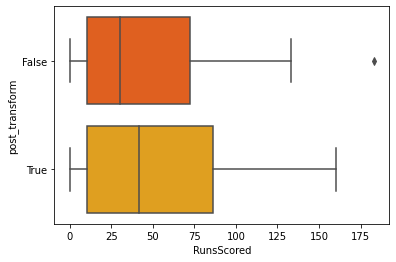

In [14]:
sns.boxplot(x="RunsScored", y="post_transform", data=mydata, orient='h', palette='autumn')
plt.show()

**We can see clearly from the plot, post transformation, he has been scoring more runs as the median value has shifted to the right.**

## Q 7. Use a Boxplot to compare the Balls Faced before and after transformation

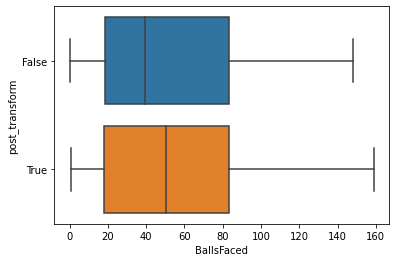

In [15]:
sns.boxplot(x="BallsFaced", y="post_transform", data=mydata, orient='h')
plt.show()

**Post transformation**, the median value for number of balls faced has also shifted to the right. This clearly shows his ability to play longer innings has improved post transformation

## Q 8. Use a Boxplot to compare the runs Scored before and after transformation with Hue as innings(innings wise)


<AxesSubplot:xlabel='RunsScored', ylabel='post_transform'>

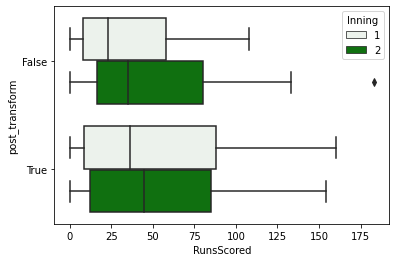

In [16]:
sns.boxplot(x="RunsScored", y="post_transform",hue='Inning', data=mydata, orient='h', color='green')

**Clearly, Kohli was good at chasing as compared to batting first, prior he went through the transformation. But post transformation, he has significantly improved his run scoring ability batting first.**

## Q 9. Use a bar plot to compare the dismissal patterns before and after transformation.
[Hint: Bar Plot]

In [17]:
pd.crosstab(index = mydata['post_transform'],columns=mydata['Dismissal'], values=mydata['RunsScored'],margins=True,aggfunc='mean')

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped,All
post_transform,,,,,,,,
False,27.454545,42.000000,107.0,23.750000,82.166667,42.0,16.5,44.159091
True,56.400000,42.397260,NaN,40.000000,80.480000,50.0,107.5,52.883333
All,41.238095,42.239669,107.0,29.166667,81.027027,46.0,62.0,49.192308


The average score before getting stumped and bowled has drastically improved post transformation. Average runs scored before 'Run Out' has also improved.

## Q 11. Can we say there is a  linear relationship between RunsScored & BallsFaced over different batting positions?
[Hint: Use LMplot]

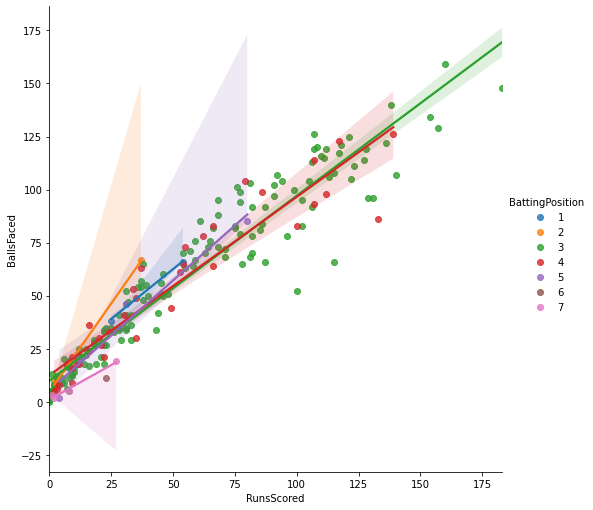

In [20]:
sns.lmplot(x="RunsScored", y="BallsFaced",hue='BattingPosition', data=mydata,height=7)
plt.show()

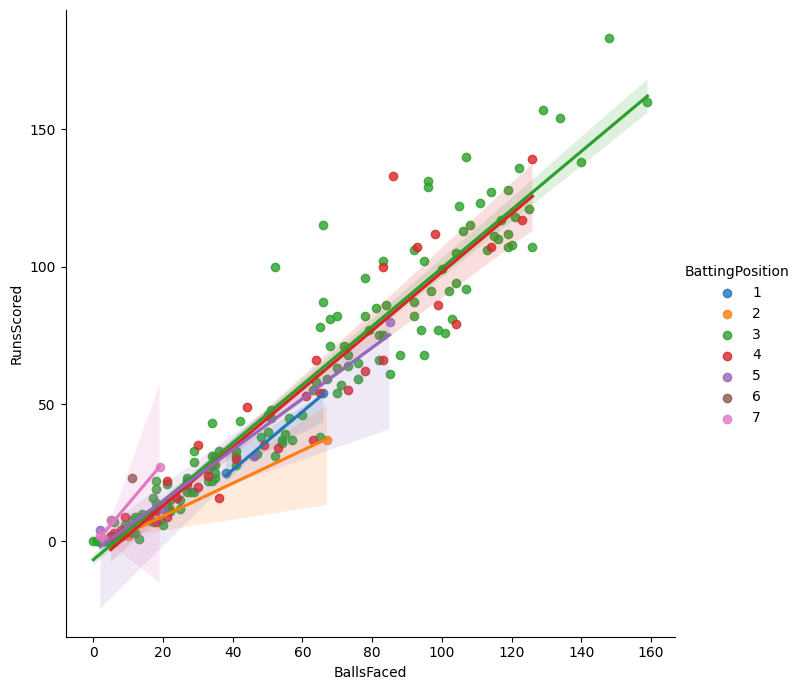

In [13]:
sns.lmplot(x="BallsFaced", y="RunsScored",hue='BattingPosition', data=mydata,height=7)
plt.show()

 The relationship is linear between RunsScored & BallsFaced over all the batting positions. At position number 3 number of balls faced is highest and highest score also stands at batting position 3.

1. Against Pakistan, Bangladesh and Australia Kohli experimented playing only at two batting position ( Position-3 and 4).
2. Against Sri Lanka he has been experimenting the highest: Has been an Opener and also batted at 7th position. Against West Indies, South Africa and England he has experimented a lot in coming at different batting positions.
3. Against Zimbabwe he has only batted at position 3.
